In [160]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

print(sample)
#print(type(sample))

[15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


Text(0.5, 0, 'Sample')

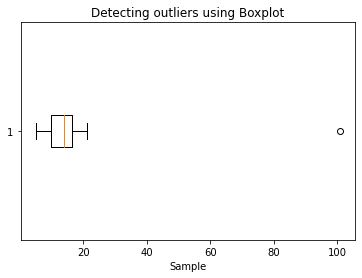

In [161]:
import matplotlib.pyplot as plt
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [162]:
#Outliers from Z-scores method

import numpy as np
outliers = []

def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)


Outliers from Z-scores method:  [101]


In [163]:
#Detecting outliers using the Inter Quantile Range(IQR)

outliers = []

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


In [164]:
sample_outliers=np.array([sample_outliers])
type(sample_outliers)

numpy.ndarray

In [ ]:
sample_outliers

In [166]:
sample

[15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

In [165]:
#5.1 Trimming/Remove the outliers
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
    print(a)
    
    

print(len(sample), len(a))

[15 18  7 13 16 11 21  5 15 10  9]
12 11


In [170]:
#5.2 Quantile based flooring and capping

# Computing 10th, 90th percentiles and replacing the outliers

tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)

# print(tenth_percentile, ninetieth_percentile)

b = np.where(sample<tenth_percentile, tenth_percentile, sample)

b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

print("Sample:", sample)
print("New array:",b)

Sample: [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


In [167]:
sample

[15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

In [171]:
#5.3 Mean/Median imputation


median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
New array:  [15 14 18  7 13 16 11 21  5 15 10  9]


In [ ]:
#Try this later
plt.boxplot(c.values(), vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")